<h1>Contenido<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Taller:-Análisis-de-sentimientos-y-técnicas-de-NLP" data-toc-modified-id="Taller:-Análisis-de-sentimientos-y-técnicas-de-NLP-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>Taller: Análisis de sentimientos y técnicas de NLP</a></span><ul class="toc-item"><li><span><a href="#Datos-predicción-sentimientos-de-viajeros-en-Twitter" data-toc-modified-id="Datos-predicción-sentimientos-de-viajeros-en-Twitter-0.0.1.1"><span class="toc-item-num">0.0.1.1&nbsp;&nbsp;</span>Datos predicción sentimientos de viajeros en Twitter</a></span></li><li><span><a href="#Análisis-descriptivo" data-toc-modified-id="Análisis-descriptivo-0.0.1.2"><span class="toc-item-num">0.0.1.2&nbsp;&nbsp;</span>Análisis descriptivo</a></span></li><li><span><a href="#Liberias-y-Variables-de-interés-y-predicción" data-toc-modified-id="Liberias-y-Variables-de-interés-y-predicción-0.0.1.3"><span class="toc-item-num">0.0.1.3&nbsp;&nbsp;</span>Liberias y Variables de interés y predicción</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Punto-1---Uso-de-CountVectorizer" data-toc-modified-id="Punto-1---Uso-de-CountVectorizer-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Punto 1 - Uso de CountVectorizer</a></span></li><li><span><a href="#Punto-2---Eliminación-de-Stopwords" data-toc-modified-id="Punto-2---Eliminación-de-Stopwords-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Punto 2 - Eliminación de Stopwords</a></span></li><li><span><a href="#Punto-3---Lematización-con-verbos" data-toc-modified-id="Punto-3---Lematización-con-verbos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Punto 3 - Lematización con verbos</a></span></li><li><span><a href="#Punto-4---Multiples-técnicas" data-toc-modified-id="Punto-4---Multiples-técnicas-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Punto 4 - Multiples técnicas</a></span></li><li><span><a href="#Punto-5---Comparación-y-análisis-de-resultados" data-toc-modified-id="Punto-5---Comparación-y-análisis-de-resultados-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Punto 5 - Comparación y análisis de resultados</a></span></li></ul></div>

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

### Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

#### Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

#### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

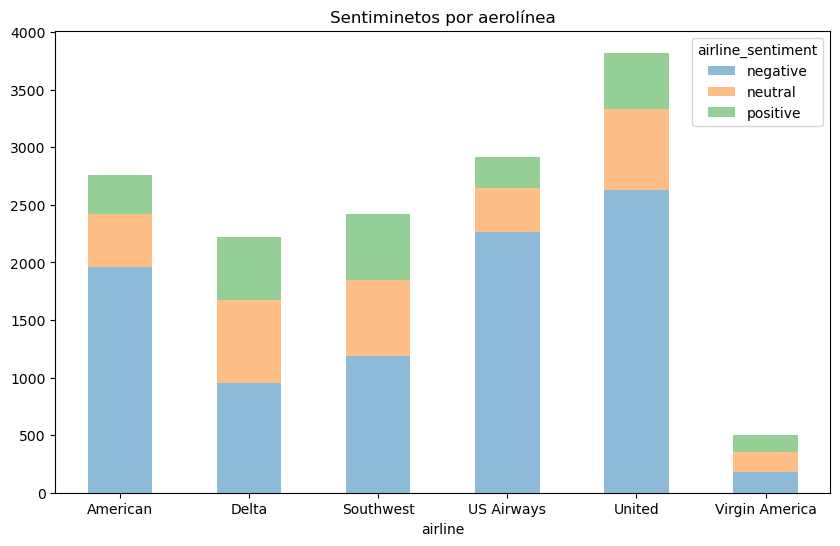

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

In [8]:
tweets.describe()

,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,14640.000000,10522.000000,14640.000000
mean,0.900169,0.638298,0.082650
std,0.162830,0.330440,0.745778
min,0.335000,0.000000,0.000000
25%,0.692300,0.360600,0.000000
50%,1.000000,0.670600,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,44.000000


#### Liberias y Variables de interés y predicción

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import metrics

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [10]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [11]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Creación de matrices de documentos usando CountVectorizer a partir de X
CountVec = CountVectorizer()

In [13]:
#CountVecTr = CountVec.transform(X_train)
CountVecX = CountVec.fit_transform(X_train)
CountVecTe = CountVec.transform(X_test)

In [14]:
CountVec.vocabulary_

{'jetblue': 6206,
 'of': 7768,
 'course': 3393,
 'am': 1680,
 'americanair': 1695,
 'complt': 3218,
 'incompetence': 5893,
 'on': 7815,
 'flt': 4790,
 '295': 508,
 'lav': 6525,
 'delay': 3661,
 'from': 4975,
 'pln': 8327,
 'that': 10546,
 'lnded': 6713,
 'last': 6503,
 'nite': 7566,
 'no': 7580,
 'internet': 6039,
 'and': 1729,
 'poor': 8364,
 'svc': 10323,
 'not': 7655,
 'what': 11670,
 'expect': 4460,
 'southwestair': 9955,
 'flight': 4735,
 '4968': 846,
 'n8325d': 7405,
 'departs': 3705,
 'mco': 7032,
 'enroute': 4292,
 'to': 10724,
 'no_airport': 7582,
 'http': 5713,
 'co': 3090,
 'fd4snvkiem': 4597,
 'usairways': 11325,
 'does': 3962,
 'anyone': 1798,
 'your': 11982,
 'airline': 1584,
 'know': 6426,
 'how': 5694,
 'do': 3953,
 'their': 10562,
 'job': 6254,
 'united': 11192,
 'want': 11570,
 'plane': 8290,
 'dad': 3546,
 'my': 7375,
 '386': 664,
 'dallas': 3556,
 'jacksonville': 6151,
 'fl': 4711,
 'has': 5448,
 'been': 2231,
 'cancelled': 2710,
 'flightled': 4765,
 'one': 7821,
 '

In [15]:
# Creamos el objeto de Regresión Linear
RclCV = RandomForestClassifier()

In [16]:
# Entrenamos nuestro modelo
RclCV.fit(CountVecX, y_train)

RandomForestClassifier()

In [17]:
# Hacemos las predicciones que en definitiva una línea
yPred = RclCV.predict(CountVecTe)

In [18]:
X_test['Predicted']=RclCV.predict(CountVecTe)

In [19]:
# ACCURACY
CountAccuracy = metrics.accuracy_score(y_test, yPred)
print("Mean squared error:" , CountAccuracy)

Mean squared error: 0.7715231788079471


# Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [20]:
CountVecSW= CountVectorizer(stop_words='english')

In [21]:
# Impresión de stopwords del texto
print(CountVecSW.get_stop_words())

frozenset({'of', 'anyway', 'this', 'several', 'behind', 'every', 'too', 'fire', 'not', 'whereby', 'also', 'am', 'formerly', 'nobody', 'whole', 'thick', 'herself', 'last', 'could', 'much', 'amoungst', 'go', 'its', 'besides', 'whether', 'front', 'whose', 'less', 'un', 'forty', 'ever', 'now', 'though', 'more', 'move', 'each', 'which', 'himself', 'thereby', 'him', 'everyone', 'empty', 'con', 'upon', 'however', 'over', 'either', 'beforehand', 'within', 'afterwards', 'although', 'should', 'on', 'three', 'itself', 'whom', 'before', 'system', 'during', 'nowhere', 'third', 'alone', 'throughout', 'any', 'six', 'since', 'well', 'somehow', 'noone', 'least', 'with', 'part', 'couldnt', 'nothing', 'why', 'often', 'here', 'ourselves', 'take', 'must', 'yet', 'none', 'that', 'made', 'still', 'among', 'other', 'what', 'describe', 'while', 'and', 'become', 'against', 'onto', 'whereupon', 'became', 'into', 'i', 'off', 'mostly', 'thereupon', 'latterly', 'whereas', 'otherwise', 'please', 'these', 'etc', 'thu

In [22]:
CountVecSWX = CountVecSW.fit_transform(X_train)
#CountVecSWTe = CountVecSW.transform(X_test)
X_test_list = [str(x) for x in X_test.tolist()]
CountVecSWTe = CountVecSW.transform(X_test_list)

In [23]:
CountVecSW.vocabulary_

{'jetblue': 6081,
 'course': 3335,
 'americanair': 1680,
 'complt': 3163,
 'incompetence': 5775,
 'flt': 4701,
 '295': 508,
 'lav': 6398,
 'delay': 3601,
 'pln': 8147,
 'lnded': 6584,
 'nite': 7417,
 'internet': 5919,
 'poor': 8184,
 'svc': 10116,
 'expect': 4378,
 'southwestair': 9750,
 'flight': 4646,
 '4968': 846,
 'n8325d': 7261,
 'departs': 3645,
 'mco': 6900,
 'enroute': 4218,
 'no_airport': 7432,
 'http': 5599,
 'fd4snvkiem': 4515,
 'usairways': 11078,
 'does': 3899,
 'airline': 1578,
 'know': 6300,
 'job': 6129,
 'united': 10949,
 'want': 11321,
 'plane': 8111,
 'dad': 3487,
 '386': 664,
 'dallas': 3497,
 'jacksonville': 6026,
 'fl': 4622,
 'cancelled': 2658,
 'flightled': 4676,
 'notified': 7519,
 'going': 5114,
 'trying': 10673,
 'make': 6785,
 'probably': 8348,
 'late': 6384,
 'did': 3721,
 'email': 4147,
 'pittsburgh': 8091,
 'international': 5917,
 'look': 6638,
 'forward': 4815,
 'jb': 6057,
 'rt': 9092,
 'bostongarden': 2403,
 'looking': 6642,
 'welcoming': 11393,
 'onbo

In [24]:
# Creamos el objeto de Regresión Linear
RclSW = RandomForestClassifier()

In [25]:
# Entrenamos nuestro modelo
RclSW.fit(CountVecSWX, y_train)

RandomForestClassifier()

In [26]:
# Hacemos las predicciones que en definitiva una línea
yPredSW = RclSW.predict(CountVecSWTe)

In [27]:
# ACCURACY
yPredSW = yPredSW[:-1]  ##fix_err
CountVectorizerSW = metrics.accuracy_score(y_test, yPredSW)
print("Mean squared error:" , CountVectorizerSW)

Mean squared error: 0.7651076158940397


# Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [28]:
# Inicialización de stemmer
stemmer = SnowballStemmer('english')

In [29]:
# Creación de matrices de documentos usando CountVectorizer a partir de X
CountVecLeS = CountVectorizer()
CountVecLeS.fit(X)

CountVectorizer()

In [30]:
words = list(CountVecLeS.vocabulary_.keys())

In [31]:
# Obtención e impresión de los stem de cada palabra de la lista
print([stemmer.stem(word) for word in words])

['virginamerica', 'what', 'dhepburn', 'said', 'plus', 'you', 've', 'ad', 'commerci', 'to', 'the', 'experi', 'tacki', 'didn', 'today', 'must', 'mean', 'need', 'take', 'anoth', 'trip', 'it', 'realli', 'aggress', 'blast', 'obnoxi', 'entertain', 'in', 'your', 'guest', 'face', 'amp', 'they', 'have', 'littl', 'recours', 'and', 'big', 'bad', 'thing', 'about', 'serious', 'would', 'pay', '30', 'flight', 'for', 'seat', 'that', 'this', 'play', 'onli', 'fli', 'va', 'yes', 'near', 'everi', 'time', 'fli', 'vx', 'ear', 'worm', 'won', 'go', 'away', 'miss', 'prime', 'opportun', 'men', 'without', 'hat', 'parodi', 'there', 'https', 'co', 'mwpg7grezp', 'well', 'but', 'now', 'do', 'was', 'amaz', 'arriv', 'an', 'hour', 'earli', 're', 'too', 'good', 'me', 'did', 'know', 'suicid', 'is', 'second', 'lead', 'caus', 'of', 'death', 'among', 'teen', '10', '24', 'lt', 'pretti', 'graphic', 'so', 'much', 'better', 'than', 'minim', 'iconographi', 'such', 'great', 'deal', 'alreadi', 'think', 'my', '2nd', 'australia', 'h

In [32]:
# Importación de librerias
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\anaconda3\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
# Obtención e impresión de los lemas de cada palabra de la lista asumiendo que cada palabra es un sustantivo
print([wordnet_lemmatizer.lemmatize(word) for word in words])

['virginamerica', 'what', 'dhepburn', 'said', 'plus', 'you', 've', 'added', 'commercial', 'to', 'the', 'experience', 'tacky', 'didn', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip', 'it', 'really', 'aggressive', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guest', 'face', 'amp', 'they', 'have', 'little', 'recourse', 'and', 'big', 'bad', 'thing', 'about', 'seriously', 'would', 'pay', '30', 'flight', 'for', 'seat', 'that', 'this', 'playing', 'only', 'flying', 'va', 'yes', 'nearly', 'every', 'time', 'fly', 'vx', 'ear', 'worm', 'won', 'go', 'away', 'missed', 'prime', 'opportunity', 'men', 'without', 'hat', 'parody', 'there', 'http', 'co', 'mwpg7grezp', 'well', 'but', 'now', 'do', 'wa', 'amazing', 'arrived', 'an', 'hour', 'early', 're', 'too', 'good', 'me', 'did', 'know', 'suicide', 'is', 'second', 'leading', 'cause', 'of', 'death', 'among', 'teen', '10', '24', 'lt', 'pretty', 'graphic', 'so', 'much', 'better', 'than', 'minimal', 'iconography', 'such', 'great', 'deal', 

In [34]:
# Obtención e impresión de los lemas de cada palabra de la lista asumiendo que cada palabra es un verbo
print([wordnet_lemmatizer.lemmatize(word,pos='v') for word in words])

['virginamerica', 'what', 'dhepburn', 'say', 'plus', 'you', 've', 'add', 'commercials', 'to', 'the', 'experience', 'tacky', 'didn', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip', 'it', 'really', 'aggressive', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'face', 'amp', 'they', 'have', 'little', 'recourse', 'and', 'big', 'bad', 'thing', 'about', 'seriously', 'would', 'pay', '30', 'flight', 'for', 'seat', 'that', 'this', 'play', 'only', 'fly', 'va', 'yes', 'nearly', 'every', 'time', 'fly', 'vx', 'ear', 'worm', 'win', 'go', 'away', 'miss', 'prime', 'opportunity', 'men', 'without', 'hat', 'parody', 'there', 'https', 'co', 'mwpg7grezp', 'well', 'but', 'now', 'do', 'be', 'amaze', 'arrive', 'an', 'hour', 'early', 're', 'too', 'good', 'me', 'do', 'know', 'suicide', 'be', 'second', 'lead', 'cause', 'of', 'death', 'among', 'teens', '10', '24', 'lt', 'pretty', 'graphics', 'so', 'much', 'better', 'than', 'minimal', 'iconography', 'such', 'great', 'deal', 'already', 't

In [35]:
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

In [36]:
# Creación de matrices de documentos usando CountVectorizer, usando el parámetro 'split_into_lemmas'
CountVecLe = CountVectorizer(analyzer=split_into_lemmas)

In [37]:
CountVecLeX = CountVecLe .fit_transform(X_train)
#CountVecLeTe = CountVecLe.transform(X_test)
X_test_list = [str(x) for x in X_test.tolist()]
CountVecLeTe = CountVecLe.transform(X_test_list)

In [38]:
CountVecLe.vocabulary_

{'@jetblue': 4129,
 'of': 14039,
 'course': 7503,
 'i': 11601,
 'am!!✈️': 5099,
 '@americanair': 3838,
 'complt': 7233,
 'incompetence': 11765,
 'on': 14122,
 'flt': 9549,
 '295.lav': 2891,
 'delay': 7900,
 'from': 9763,
 'a': 4550,
 'pln': 14924,
 'that': 17790,
 'lnded': 12739,
 'last': 12443,
 'nite,': 13808,
 'no': 13815,
 'internet': 11962,
 'and': 5147,
 'poor': 14991,
 'svc.': 17524,
 'not': 13883,
 'what': 19367,
 'expect': 9001,
 'u.': 18497,
 '@southwestair': 4380,
 'flight': 9388,
 '4968': 3241,
 '(n8325d)': 2051,
 'departs': 8011,
 '@mco': 4236,
 'enroute': 8778,
 'to': 18082,
 '@no_airport': 4276,
 'http://t.co/fd4snvkiem': 10994,
 '@usairways': 4472,
 'doe': 8366,
 'anyone': 5238,
 'your': 19823,
 'airline': 4946,
 'know': 12345,
 'how': 10711,
 'do': 8347,
 'their': 17814,
 'job?': 12216,
 '@united': 4456,
 'want': 19194,
 'plane': 14827,
 'dad': 7710,
 'my': 13634,
 '386': 3049,
 'dallas': 7721,
 'jacksonville': 12124,
 'fl': 9355,
 'ha': 10199,
 'been': 5899,
 'cancell

In [39]:
# Creamos el objeto de Regresión Linear
RclLe = RandomForestClassifier()

In [40]:
# Entrenamos nuestro modelo
RclLe.fit(CountVecLeX, y_train)

RandomForestClassifier()

In [41]:
# Hacemos las predicciones que en definitiva una línea
yPredLe = RclLe.predict(CountVecLeTe)

In [42]:
# ACCURACY
yPredLe = yPredLe[:-1] ##fix_err
CountVectorizerLe = metrics.accuracy_score(y_test, yPredLe)
print("Mean squared error:" , CountVectorizerLe)

Mean squared error: 0.7603476821192053


# Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [43]:
# Celda 4
CountVecAll= CountVectorizer(stop_words='english')

In [44]:
# Impresión de stopwords del texto
print(CountVecAll.get_stop_words())

frozenset({'of', 'anyway', 'this', 'several', 'behind', 'every', 'too', 'fire', 'not', 'whereby', 'also', 'am', 'formerly', 'nobody', 'whole', 'thick', 'herself', 'last', 'could', 'much', 'amoungst', 'go', 'its', 'besides', 'whether', 'front', 'whose', 'less', 'un', 'forty', 'ever', 'now', 'though', 'more', 'move', 'each', 'which', 'himself', 'thereby', 'him', 'everyone', 'empty', 'con', 'upon', 'however', 'over', 'either', 'beforehand', 'within', 'afterwards', 'although', 'should', 'on', 'three', 'itself', 'whom', 'before', 'system', 'during', 'nowhere', 'third', 'alone', 'throughout', 'any', 'six', 'since', 'well', 'somehow', 'noone', 'least', 'with', 'part', 'couldnt', 'nothing', 'why', 'often', 'here', 'ourselves', 'take', 'must', 'yet', 'none', 'that', 'made', 'still', 'among', 'other', 'what', 'describe', 'while', 'and', 'become', 'against', 'onto', 'whereupon', 'became', 'into', 'i', 'off', 'mostly', 'thereupon', 'latterly', 'whereas', 'otherwise', 'please', 'these', 'etc', 'thu

In [45]:
# Creación de matrices de documentos usando CountVectorizer a partir de X
CountVecLeAll = CountVectorizer()
CountVecLeAll.fit(CountVecAll.get_stop_words())

CountVectorizer()

In [46]:
wordsAll = list(CountVecLeAll.vocabulary_.keys())

In [47]:
print([stemmer.stem(word) for word in wordsAll])

['of', 'anyway', 'this', 'sever', 'behind', 'everi', 'too', 'fire', 'not', 'wherebi', 'also', 'am', 'former', 'nobodi', 'whole', 'thick', 'herself', 'last', 'could', 'much', 'amoungst', 'go', 'it', 'besid', 'whether', 'front', 'whose', 'less', 'un', 'forti', 'ever', 'now', 'though', 'more', 'move', 'each', 'which', 'himself', 'therebi', 'him', 'everyon', 'empti', 'con', 'upon', 'howev', 'over', 'either', 'beforehand', 'within', 'afterward', 'although', 'should', 'on', 'three', 'itself', 'whom', 'befor', 'system', 'dure', 'nowher', 'third', 'alon', 'throughout', 'ani', 'six', 'sinc', 'well', 'somehow', 'noon', 'least', 'with', 'part', 'couldnt', 'noth', 'whi', 'often', 'here', 'ourselv', 'take', 'must', 'yet', 'none', 'that', 'made', 'still', 'among', 'other', 'what', 'describ', 'while', 'and', 'becom', 'against', 'onto', 'whereupon', 'becam', 'into', 'off', 'most', 'thereupon', 'latter', 'wherea', 'otherwis', 'pleas', 'these', 'etc', 'thus', 'me', 'there', 'cri', 'neither', 'back', 'wh

In [48]:
# Obtención e impresión de los lemas de cada palabra de la lista asumiendo que cada palabra es un verbo
print([wordnet_lemmatizer.lemmatize(word,pos='v') for word in wordsAll])

['of', 'anyway', 'this', 'several', 'behind', 'every', 'too', 'fire', 'not', 'whereby', 'also', 'be', 'formerly', 'nobody', 'whole', 'thick', 'herself', 'last', 'could', 'much', 'amoungst', 'go', 'its', 'besides', 'whether', 'front', 'whose', 'less', 'un', 'forty', 'ever', 'now', 'though', 'more', 'move', 'each', 'which', 'himself', 'thereby', 'him', 'everyone', 'empty', 'con', 'upon', 'however', 'over', 'either', 'beforehand', 'within', 'afterwards', 'although', 'should', 'on', 'three', 'itself', 'whom', 'before', 'system', 'during', 'nowhere', 'third', 'alone', 'throughout', 'any', 'six', 'since', 'well', 'somehow', 'noone', 'least', 'with', 'part', 'couldnt', 'nothing', 'why', 'often', 'here', 'ourselves', 'take', 'must', 'yet', 'none', 'that', 'make', 'still', 'among', 'other', 'what', 'describe', 'while', 'and', 'become', 'against', 'onto', 'whereupon', 'become', 'into', 'off', 'mostly', 'thereupon', 'latterly', 'whereas', 'otherwise', 'please', 'these', 'etc', 'thus', 'me', 'ther

In [49]:
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in wordsAll]

In [50]:
# Creación de matrices de documentos usando CountVectorizer, usando el parámetro 'split_into_lemmas'
CountVecAll = CountVectorizer(analyzer=split_into_lemmas)

In [51]:
CountVecAllX = CountVecAll.fit_transform(X_train)
#CountVecAllTe = CountVecAll.transform(X_test)
X_test_list = [str(x) for x in X_test.tolist()]
CountVecAllTe = CountVecAll.transform(X_test_list)

In [52]:
CountVecAll.vocabulary_

{'of': 180,
 'anyway': 28,
 'this': 253,
 'several': 212,
 'behind': 43,
 'every': 84,
 'too': 263,
 'fire': 94,
 'not': 176,
 'whereby': 290,
 'also': 13,
 'am': 16,
 'formerly': 99,
 'nobody': 172,
 'whole': 300,
 'thick': 250,
 'herself': 123,
 'last': 141,
 'could': 61,
 'much': 160,
 'amoungst': 19,
 'go': 109,
 'it': 138,
 'besides': 47,
 'whether': 294,
 'front': 104,
 'whose': 302,
 'le': 144,
 'un': 271,
 'forty': 100,
 'ever': 83,
 'now': 178,
 'though': 255,
 'more': 155,
 'move': 159,
 'each': 72,
 'which': 295,
 'himself': 125,
 'thereby': 244,
 'him': 124,
 'everyone': 85,
 'empty': 79,
 'con': 60,
 'upon': 275,
 'however': 128,
 'over': 196,
 'either': 75,
 'beforehand': 42,
 'within': 306,
 'afterwards': 5,
 'although': 14,
 'should': 214,
 'on': 183,
 'three': 256,
 'itself': 139,
 'whom': 301,
 'before': 41,
 'system': 231,
 'during': 71,
 'nowhere': 179,
 'third': 252,
 'alone': 10,
 'throughout': 258,
 'any': 24,
 'six': 219,
 'since': 217,
 'well': 280,
 'somehow':

In [53]:
# Creamos el objeto de Regresión Linear
RclAll = RandomForestClassifier()

In [54]:
# Entrenamos nuestro modelo
RclAll.fit(CountVecAllX, y_train)

RandomForestClassifier()

In [55]:
# Hacemos las predicciones que en definitiva una línea
yPredAll = RclAll.predict(CountVecAllTe)

In [56]:
# ACCURACY
yPredAll = yPredAll[:-1]  ## fix_err
CountVectorizerAll = metrics.accuracy_score(y_test, yPredAll)
print("Mean squared error:" , CountVectorizerAll)

Mean squared error: 0.6384519867549668


# Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [57]:
# Función de comparación con matriz de confusión
def plot_confusion_matrix(Test ,Pred, title='Confusion matrix'):
    cm = confusion_matrix(Test, Pred)
    #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    
    classes=[-1,0,1]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Verdad')
    plt.xlabel('Predicción')

In [58]:
CountVectorizer = metrics.accuracy_score(y_test, yPred)
print("Mean squared error cv:" , CountVectorizer)

# Error ACCURACY stop words
CountVectorizerSW = metrics.accuracy_score(y_test, yPredSW)
print("Mean squared error sw:" , CountVectorizerSW)

# Error ACCURACY Lematizacion
CountVectorizerLe = metrics.accuracy_score(y_test, yPredLe)
print("Mean squared error le:" , CountVectorizerLe)

# ACCURACY
CountVectorizerAll = metrics.accuracy_score(y_test, yPredAll)
print("Mean squared error:" , CountVectorizerAll)

Mean squared error cv: 0.7715231788079471
Mean squared error sw: 0.7651076158940397
Mean squared error le: 0.7603476821192053
Mean squared error: 0.6384519867549668


In [59]:
y_test

tweet_id
569731104070115329    1
569263373092823040   -1
568818669024907264   -1
567775864679456768    0
568526521910079488   -1
                     ..
569221909231104000    1
568787831436345344   -1
569500787849728001   -1
568790685723136001    0
569956147433574401    1
Name: airline_sentiment, Length: 4832, dtype: int64

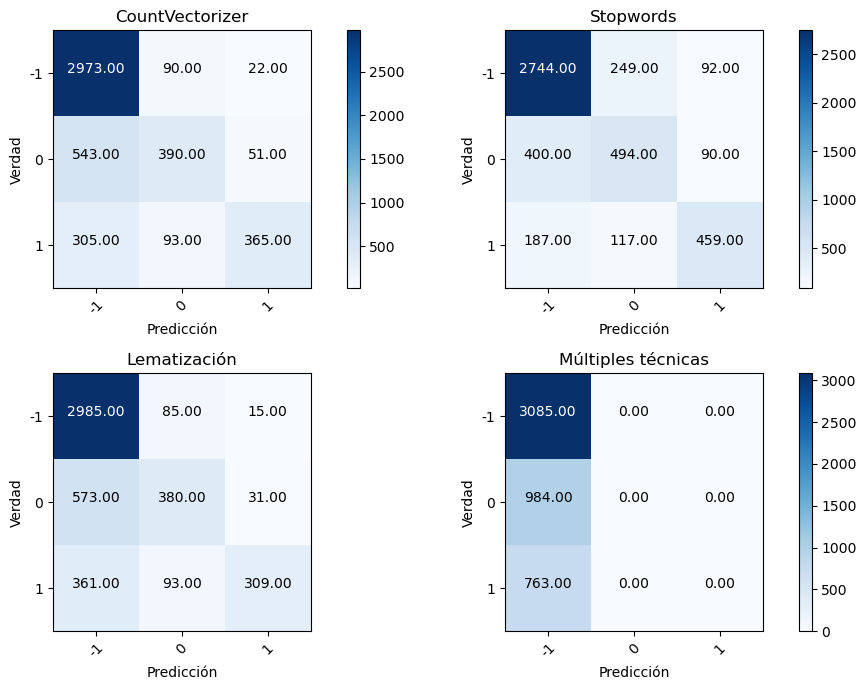

In [60]:
plt.figure(figsize=(12,7))

plt.subplot(221)
plot_confusion_matrix(y_test, yPred, title='CountVectorizer')

plt.subplot(222)
plot_confusion_matrix(y_test, yPredSW, title='Stopwords')

plt.subplot(223)
plot_confusion_matrix(y_test, yPredLe, title='Lematización')

plt.subplot(224)
plot_confusion_matrix(y_test, yPredAll, title='Múltiples técnicas')

plt.tight_layout()
plt.show()

**Análisis:**
- La combinación de métodos de preparación CountVectorizer, retirar las palabras vacías (stopwords) y lematización creo un vocabulario más compacto que distorsionó las escalas de sentimiento. Al predecir con esta técnica todos los tweets fueron clasificados como negativos (-1). Se debe buscar un equilibrio en el nivel de preparación que se aplica para evitar el sobre ajuste en los algoritmos de predicción

- El conteo de palabras por defecto (CountVectorizer) maneja un vocabulario con palabras ruido que no afectan drásticamente la predicción sobre el sentimiento de los tweets.

- Se demuestra el valor de hacer preprocesamiento de datos para lograr resultados más efectivos con NPL, pero, se evidencia la necesidad de hacerlo de manera controlada para evitar transformaciones radicales en los datos que atenten contra el sentido de los textos y sus sentimientos.

- En todas las técnicas utilizadas el sentimiento positivo de los tweets es el más difícil de predecir.